In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Load the dataset
file_path=r'C:\Users\Rose\Downloads\archive\owid-covid-data.csv'
df = pd.read_csv(file_path)

In [12]:
# Display column names
print(df.columns)

# Preview the first few rows
print(df.head())

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [14]:
# Count missing values per column
print(df.isnull().sum())

iso_code                                        0
continent                                   16665
location                                        0
date                                            0
total_cases                                 37997
                                            ...  
population                                      0
excess_mortality_cumulative_absolute       337901
excess_mortality_cumulative                337901
excess_mortality                           337901
excess_mortality_cumulative_per_million    337901
Length: 67, dtype: int64


In [16]:
# Filter for selected countries
countries_of_interest = ['Kenya', 'United States', 'India']
df_filtered = df[df['location'].isin(countries_of_interest)]

In [18]:
# Drop rows with missing dates or critical values
df_filtered = df_filtered.dropna(subset=['date', 'total_cases', 'total_deaths'])

In [20]:
# Convert 'date' to datetime
df_filtered['date'] = pd.to_datetime(df_filtered['date'])

In [24]:
# Forward-fill missing values
df_filtered.ffill(inplace=True)

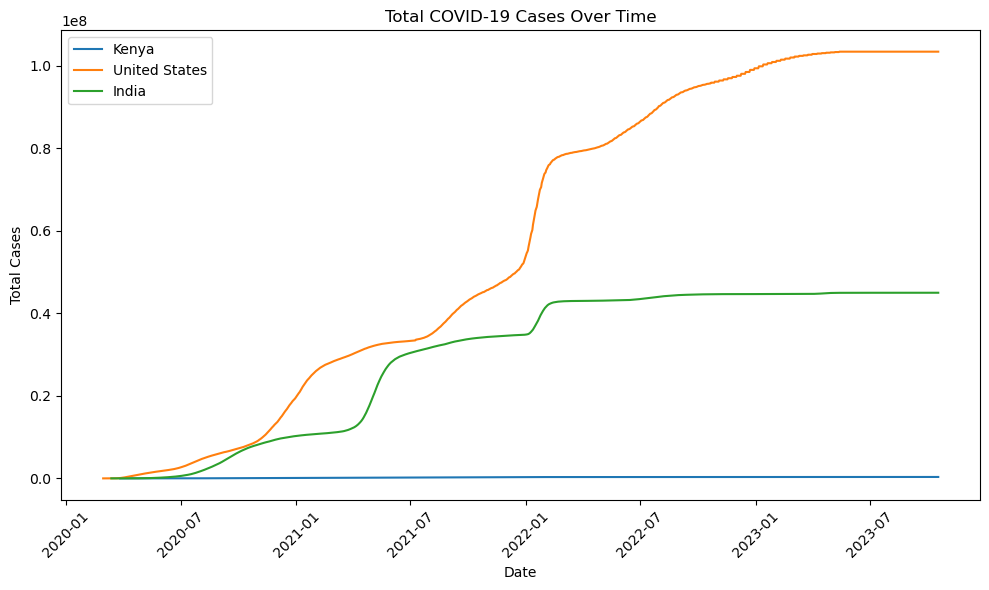

In [28]:
# Plot total cases over time
plt.figure(figsize=(10, 6))
for country in countries_of_interest:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=country)

plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

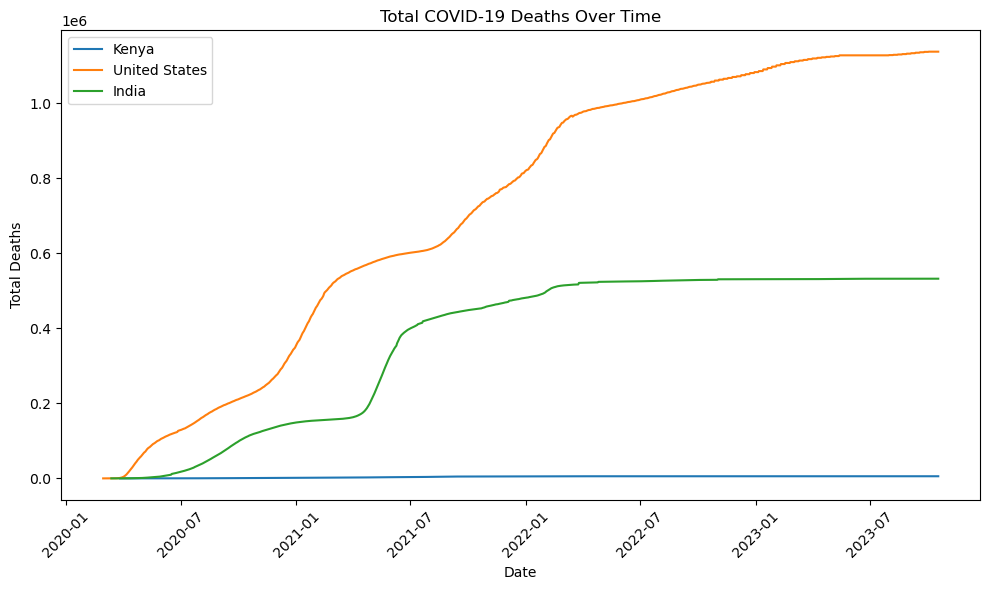

In [30]:
# Plot total deaths over time
plt.figure(figsize=(10, 6))
for country in countries_of_interest:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['total_deaths'], label=country)

plt.title('Total COVID-19 Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

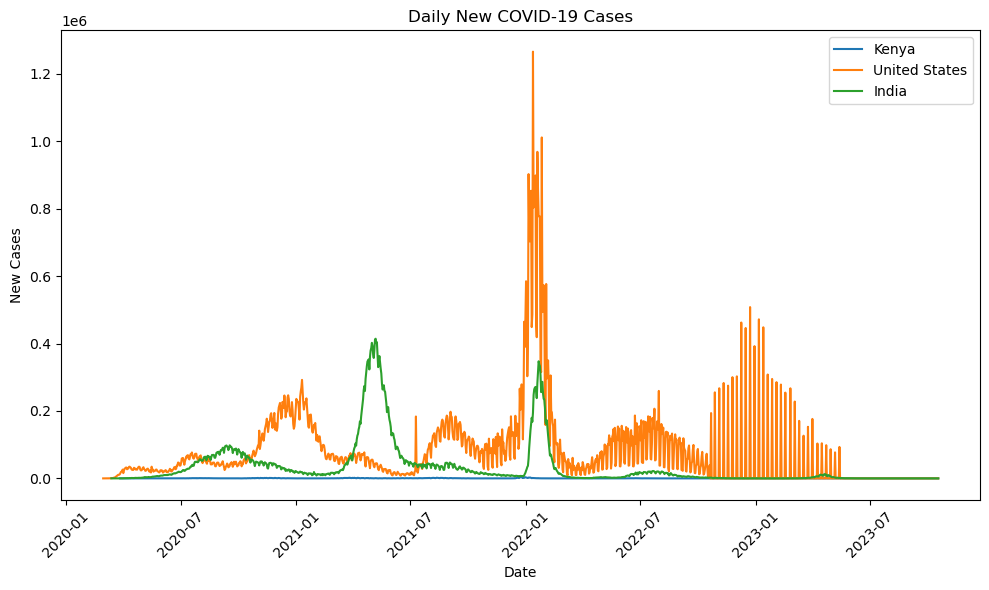

In [32]:
# Plot daily new cases
plt.figure(figsize=(10, 6))
for country in countries_of_interest:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['new_cases'], label=country)

plt.title('Daily New COVID-19 Cases')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [34]:
# Calculate death rate
df_filtered['death_rate'] = df_filtered['total_deaths'] / df_filtered['total_cases']

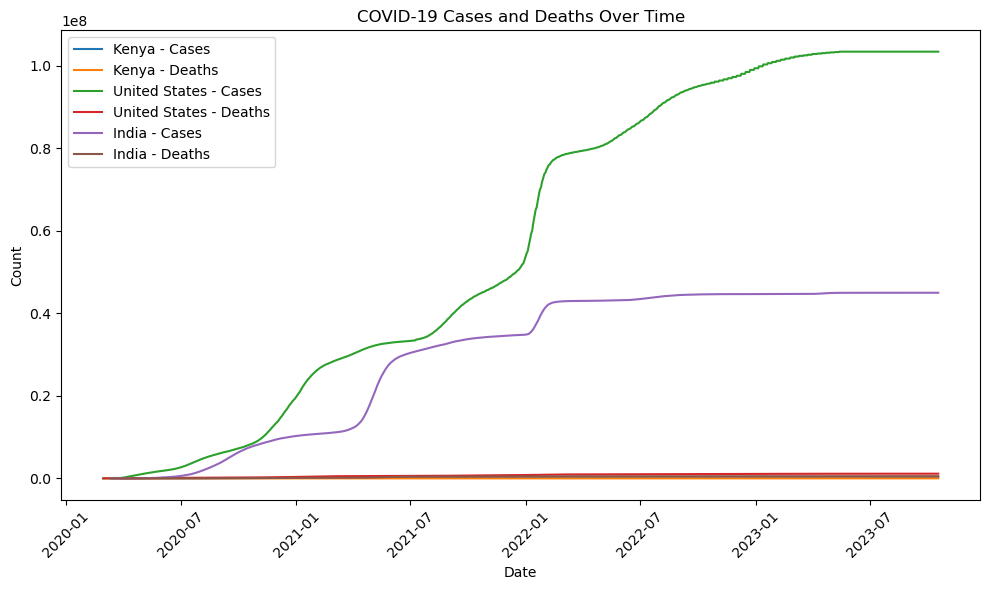

In [36]:
# Line chart for cases and deaths over time
plt.figure(figsize=(10, 6))
for country in countries_of_interest:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=f'{country} - Cases')
    plt.plot(country_data['date'], country_data['total_deaths'], label=f'{country} - Deaths')

plt.title('COVID-19 Cases and Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

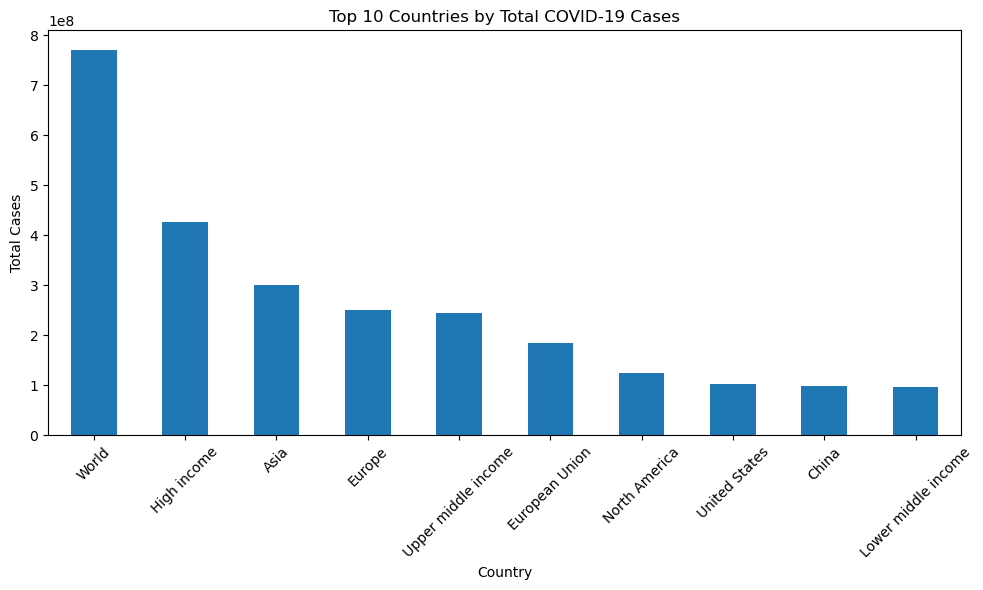

In [38]:
# Group by country and sum total cases
top_countries = df.groupby('location')['total_cases'].max().sort_values(ascending=False).head(10)

# Bar chart for top countries by total cases
plt.figure(figsize=(10, 6))
top_countries.plot(kind='bar')
plt.title('Top 10 Countries by Total COVID-19 Cases')
plt.xlabel('Country')
plt.ylabel('Total Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

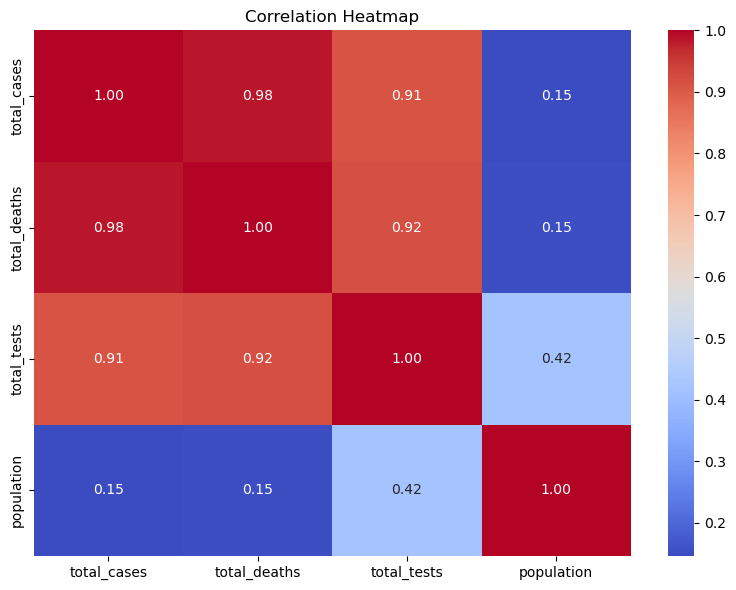

In [40]:
# Select relevant columns for correlation analysis
corr_data = df_filtered[['total_cases', 'total_deaths', 'total_tests', 'population']]

# Compute correlation matrix
corr_matrix = corr_data.corr()

# Heatmap for correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


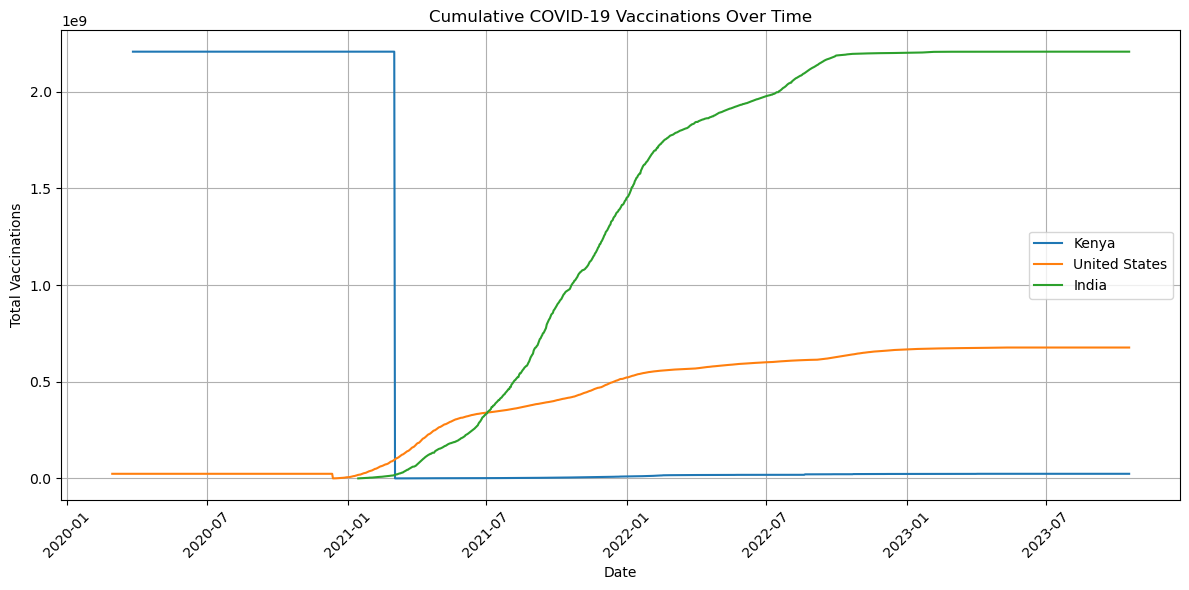

In [42]:
# List of countries to analyze
countries_of_interest = ['Kenya', 'United States', 'India']

# Plot cumulative vaccinations over time
plt.figure(figsize=(12, 6))

for country in countries_of_interest:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['total_vaccinations'], label=country)

plt.title('Cumulative COVID-19 Vaccinations Over Time')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

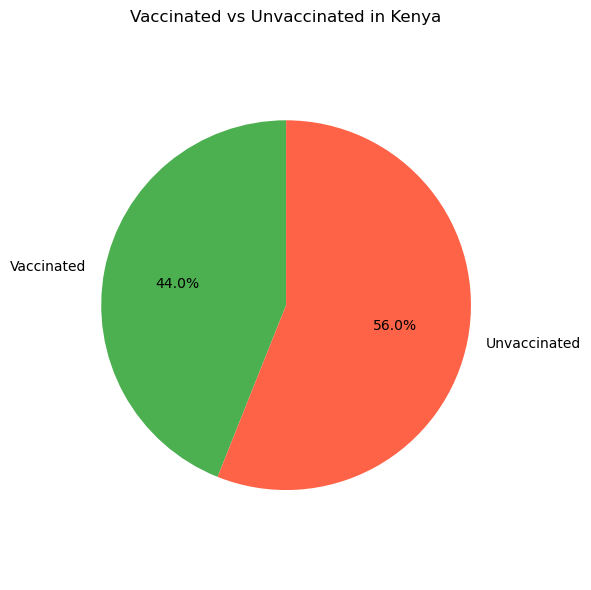

Skipping United States due to invalid data.
Skipping India due to invalid data.


In [46]:
# Pie chart for each country showing vaccinated vs unvaccinated population
for country in countries_of_interest:
    country_data = df_filtered[df_filtered['location'] == country]
    
    # Get the most recent data for each country
    latest_data = country_data.iloc[-1]  # Last row (most recent data)

    vaccinated = latest_data['total_vaccinations']
    unvaccinated = latest_data['population'] - vaccinated

    # Check if the values are valid
    if vaccinated < 0 or unvaccinated < 0 or pd.isna(vaccinated) or pd.isna(unvaccinated):
        print(f"Skipping {country} due to invalid data.")
        continue  # Skip this country if the data is invalid

    # Plot the pie chart
    plt.figure(figsize=(6, 6))
    plt.pie([vaccinated, unvaccinated], labels=['Vaccinated', 'Unvaccinated'], autopct='%1.1f%%', startangle=90, colors=['#4CAF50', '#FF6347'])
    plt.title(f'Vaccinated vs Unvaccinated in {country}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
    plt.tight_layout()
    plt.show()